In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
%run nsfg.py


(13593, 244)
nsfg.py: All tests passed.


When working with this kind of data, it is imporatant to be famliar with the **codebook**, which document the design of the study, the survey questions, and the encoding of the responses. The codebook and user's guide for the NSFG data are available from http://www.cdc.gov/nchs/nsfg/nsfg_cycle6.htm

In [ ]:
# %load nsfg.py
"""This file contains code for use with "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2010 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

from collections import defaultdict
import numpy as np
import sys

import thinkstats2


def ReadFemPreg(dct_file='2002FemPreg.dct',
                dat_file='2002FemPreg.dat.gz'):
    """Reads the NSFG pregnancy data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df


def CleanFemPreg(df):
    """Recodes variables from the pregnancy frame.

    df: DataFrame
    """
    # mother's age is encoded in centiyears; convert to years
    df.agepreg /= 100.0

    # birthwgt_lb contains at least one bogus value (51 lbs)
    # replace with NaN
    df.loc[df.birthwgt_lb > 20, 'birthwgt_lb'] = np.nan
    
    # replace 'not ascertained', 'refused', 'don't know' with NaN
    na_vals = [97, 98, 99]
    df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)
    df.hpagelb.replace(na_vals, np.nan, inplace=True)

    df.babysex.replace([7, 9], np.nan, inplace=True)
    df.nbrnaliv.replace([9], np.nan, inplace=True)

    # birthweight is stored in two columns, lbs and oz.
    # convert to a single column in lb
    # NOTE: creating a new column requires dictionary syntax,
    # not attribute assignment (like df.totalwgt_lb)
    df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0    

    # due to a bug in ReadStataDct, the last variable gets clipped;
    # so for now set it to NaN
    df.cmintvw = np.nan


def MakePregMap(df):
    """Make a map from caseid to list of preg indices.

    df: DataFrame

    returns: dict that maps from caseid to list of indices into preg df
    """
    d = defaultdict(list)
    for index, caseid in df.caseid.iteritems():
        d[caseid].append(index)
    return d


def main(script):
    """Tests the functions in this module.

    script: string script name
    """
    df = ReadFemPreg()
    print(df.shape)

    assert len(df) == 13593

    assert df.caseid[13592] == 12571
    assert df.pregordr.value_counts()[1] == 5033
    assert df.nbrnaliv.value_counts()[1] == 8981
    assert df.babysex.value_counts()[1] == 4641
    assert df.birthwgt_lb.value_counts()[7] == 3049
    assert df.birthwgt_oz.value_counts()[0] == 1037
    assert df.prglngth.value_counts()[39] == 4744
    assert df.outcome.value_counts()[1] == 9148
    assert df.birthord.value_counts()[1] == 4413
    assert df.agepreg.value_counts()[22.75] == 100
    assert df.totalwgt_lb.value_counts()[7.5] == 302

    weights = df.finalwgt.value_counts()
    key = max(weights.keys())
    assert df.finalwgt.value_counts()[key] == 6

    print('%s: All tests passed.' % script)

if __name__ == '__main__':
    main(*sys.argv)


In [5]:
import nsfg

In [6]:
df = nsfg.ReadFemPreg()

In [7]:
df

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


In [8]:
df.columns

Index([u'caseid', u'pregordr', u'howpreg_n', u'howpreg_p', u'moscurrp', u'nowprgdk', u'pregend1', u'pregend2', u'nbrnaliv', u'multbrth', u'cmotpreg', u'prgoutcome', u'cmprgend', u'flgdkmo1', u'cmprgbeg', u'ageatend', u'hpageend', u'gestasun_m', u'gestasun_w', u'wksgest', u'mosgest', u'dk1gest', u'dk2gest', u'dk3gest', u'bpa_bdscheck1', u'bpa_bdscheck2', u'bpa_bdscheck3', u'babysex', u'birthwgt_lb', u'birthwgt_oz', u'lobthwgt', u'babysex2', u'birthwgt_lb2', u'birthwgt_oz2', u'lobthwgt2', u'babysex3', u'birthwgt_lb3', u'birthwgt_oz3', u'lobthwgt3', u'cmbabdob', u'kidage', u'hpagelb', u'birthplc', u'paybirth1', u'paybirth2', u'paybirth3', u'knewpreg', u'trimestr', u'ltrimest', u'priorsmk', u'postsmks', u'npostsmk', u'getprena', u'bgnprena', u'pnctrim', u'lpnctri', u'workpreg', u'workborn', u'didwork', u'matweeks', u'weeksdk', u'matleave', u'matchfound', u'livehere', u'alivenow', u'cmkidied', u'cmkidlft', u'lastage', u'wherenow', u'legagree', u'parenend', u'anynurse', u'fedsolid', u'frstea

In [9]:
df.columns[1]

u'pregordr'

In [10]:
pregordr = df['pregordr']

In [11]:
pregordr

0     1
1     2
2     1
3     2
4     3
5     1
6     2
7     3
8     1
9     2
10    1
11    1
12    2
13    3
14    1
...
13578    1
13579    2
13580    1
13581    2
13582    3
13583    1
13584    2
13585    1
13586    2
13587    3
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

In [12]:
pregordr[0]

1

In [13]:
pregordr.head(10)

0    1
1    2
2    1
3    2
4    3
5    1
6    2
7    3
8    1
9    2
Name: pregordr, dtype: int64

In [14]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

In [15]:
pregordr = df.pregordr

## Variables

We have already seen two variables in the NSFG dataset, ```caseid``` and ```pregordr```, and we have seen that there are 244 variables in total.
For the explorations in this book, I use the following variables:

* ```caseid``` is the integer ID of the respondent
* ```prglngth``` is the integer duration of the pregnancy in weeks
* ```outcome``` is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth
* ```pregordr``` is a pregnancy serial number; for example, the code for a respondent's first child is 1, and so on.
* ```birthord``` is a serial number for live births; the code for a resopndent's first child is 1, and so on. For outcomes other than live birth, this field is blank.
* ```birthwgt_lb``` and ```birthwgt_oz``` contain the pounds and ounces parts of the birth weight of the baby
* ```agepreg``` is the mother's age at the end of the pregnancy
* ```finalwgt``` is the statistical weight associated with the respondent. It is a floating-point value that indicates the number of people in the U.S. population this respondent represents.


In [16]:
df.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
dtype: int64

In [17]:
df.birthwgt_lb.value_counts().sort_index()

0        8
1       40
2       53
3       98
4      229
5      697
6     2223
7     3049
8     1889
9      623
10     132
11      26
12      10
13       3
14       3
15       1
dtype: int64

In [18]:
df.birthwgt_lb[df.birthwgt_lb < 6].value_counts().sum()

1125

In [19]:
df.birthwgt_lb[df.birthwgt_lb == 6].value_counts().sum()

2223

In [20]:
df.birthwgt_lb[df.birthwgt_lb == 7].value_counts().sum()

3049

In [21]:
df.birthwgt_lb[df.birthwgt_lb == 8].value_counts().sum()

1889

In [22]:
df.birthwgt_lb[df.birthwgt_lb >= 9].value_counts().sum()

798

In [23]:
caseid = 10229

In [24]:
df[['outcome','caseid']][df['caseid'] == 10229]

,outcome,caseid
11093,4,10229
11094,4,10229
11095,4,10229
11096,4,10229
11097,4,10229
11098,4,10229
11099,1,10229


## Exercises

### Exercise 1
In the repository you downloaded, you should find a file named ```chap01ex.ipynb```, which is an IPython notebook. You can launch IPython notebook from the command line like this:

```
> ipython notebook 
```

If IPython is installed, it should launch a server that runs in the background and open a browser to view the notebook. If you are not familiar with IPython, I suggest you start at 
http://ipython.org/ipython-doc/stable/notebook/notebook.html.

To launch the IPython notebook server, run:

```
> ipython notebook &
```

It should open a new browser window, but if not, the startup message provides a URL you can load in a browser, usually http://localhost:8888 . The new window should list the notebooks in the repository.

Open ```chap01.ex.ipynb```. Some cells are already filled in, and you should execute them. Other cells give you instructions for exercises you should try. A solution to this exercise is in ```chap01soln.ipynb```.

## Exercise 2

In the repository you downloaded, you should find a file named ```chap01ex.py```; using this file as a starting place, write a function that reads the respondent file, ```2002FemResp.dat.gz```.
The variable ```pregnum``` is a recode that indicates how many times each respondent has been pregnant. Print the value counts for this variable and compare them to the published results in the NSFG codebook. You can also cross-validate the respondent and pregnancy files by comparing ```pregnum``` for each respondent with the number of records in the pregnancy file.

You can use ```nsf.MakePregMap``` to make a dictionary that maps from each ```caseid``` to a list of indices into the pregnancy dataframe. A solution to this exercise is in ```chap01soln.py```

In [ ]:
# %load chap01ex.py
"""This file contains code for use with "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2014 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

import numpy as np
import sys

import nsfg
import thinkstats2


def main(script):
    """Tests the functions in this module.

    script: string script name
    """
    print('%s: All tests passed.' % script)


if __name__ == '__main__':
    main(*sys.argv)


In [27]:
def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz'):
    """Reads the NSFG pregnancy data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    #CleanFemPreg(df)
    return df


In [28]:
dfresp = ReadFemResp()

In [29]:
dfresp.shape

(7643, 3087)

In [30]:
dfresp.pregnum.describe()

count    7643.000000
mean        1.778490
std         1.847921
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        19.000000
Name: pregnum, dtype: float64

In [31]:
dfresp.pregnum.value_counts().sort_index()

0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
dtype: int64

In [32]:
dfresp.pregnum[dfresp.pregnum >= 7].value_counts().sum()

158

In [33]:
dfresp.pregnum.sum()

13593

In [34]:
df.shape

(13593, 244)

In [35]:
dfresp.caseid

0      2298
1      5012
2     11586
3      6794
4       616
5       845
6     10333
7       855
8      8656
9      3566
10     5917
11     9200
12     6320
13    11700
14     7354
...
7628     6365
7629     3537
7630     1515
7631     9174
7632     4213
7633     6804
7634     1282
7635     2954
7636     4964
7637      143
7638    11018
7639     6075
7640     5649
7641      501
7642    10252
Name: caseid, Length: 7643, dtype: int64

### <font color="teal">Chapter 2 Distributions</font>

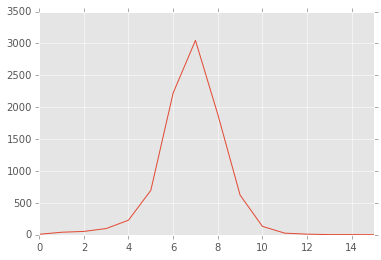

In [36]:
df.birthwgt_lb.value_counts().sort_index().plot()

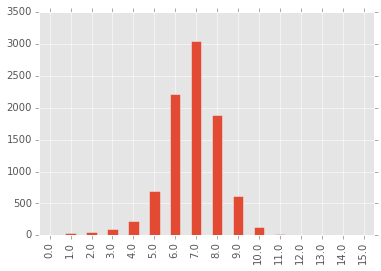

In [37]:
df.birthwgt_lb.value_counts().sort_index().plot(kind='bar')

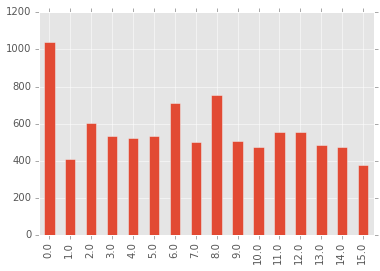

In [38]:
df.birthwgt_oz.value_counts().sort_index().plot(kind='bar')

When you start working with a new dataset, I suggest you explore the variables you are planning to use one at a time, and a good way to start is by looking at histograms.

In [39]:
df.agepreg.head()

0    33.16
1    39.25
2    14.33
3    17.83
4    18.33
Name: agepreg, dtype: float64

In [40]:
df.agepreg.round().head()

0    33
1    39
2    14
3    18
4    18
Name: agepreg, dtype: float64

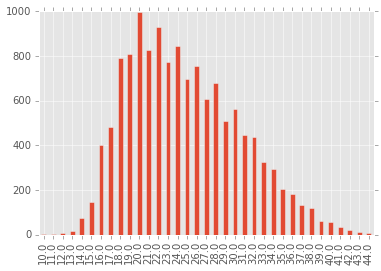

In [41]:
df.agepreg.round().value_counts().sort_index().plot(kind='bar')

In [42]:
import nsfg

In [43]:
preg = nsfg.ReadFemPreg()

In [44]:
live = preg[preg.outcome == 1]

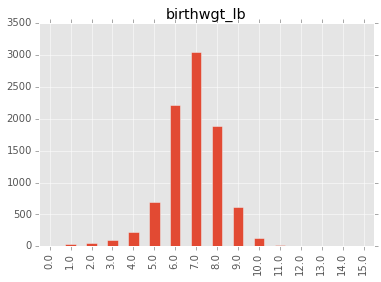

In [45]:
live.birthwgt_lb.value_counts(). \
sort_index().plot(kind='bar', title='birthwgt_lb')

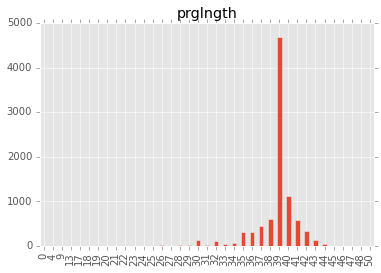

In [46]:
live.prglngth.value_counts(). \
sort_index().plot(kind='bar', title='prglngth')

Before going on, it is a good idea to check for **outliers**, which are extreme values that might be errors in measurement and recording, or might be accurate reports of rare events.

In [47]:
live.prglngth.value_counts().sort_index().head(20)

0       1
4       1
9       1
13      1
17      2
18      1
19      1
20      1
21      2
22      7
23      1
24     13
25      3
26     35
27      3
28     32
29     21
30    138
31     27
32    115
dtype: int64

In [48]:
live.prglngth.value_counts().sort_index().tail(20)

30     138
31      27
32     115
33      49
34      60
35     311
36     321
37     455
38     607
39    4693
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
dtype: int64

The best way to handle outliers depends on "domain knowledge": that is, information about where the data come from and what they mean. And it depends on what analysis you are planning to perform.

In [49]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

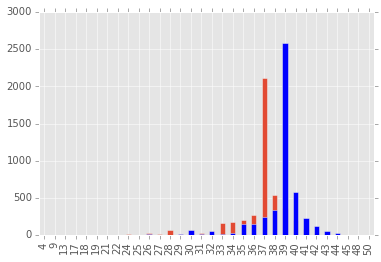

In [50]:
firsts.prglngth.value_counts(). \
sort_index().plot(kind='bar',label='firsts')
others.prglngth.value_counts(). \
sort_index().plot(kind='bar', label='others',color='blue')

In [51]:
firstbabies = firsts.prglngth.value_counts(). \
sort_index()

In [52]:
otherbabies = others.prglngth.value_counts().sort_index()

In [53]:
dfcf = pd.DataFrame({'first_babies': firstbabies,
                    'other_babies': otherbabies})

In [54]:
dfcf.loc[17]

first_babies    1
other_babies    1
Name: 17, dtype: float64

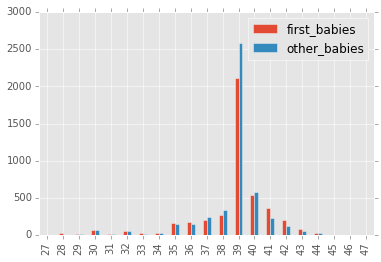

In [55]:
dfcf.loc[27:47].plot(kind='bar')


Histograms are useful because they make the most frequent values immediately apparent. But they are not the best choice for comparing two distributions. In this example, there are fewer "first babies" than "others," so some of the apparent differences in the histograms are due to sample sizes. In the next chapter we address this problem using probability mass functions.

In [56]:
mean = live.prglngth.mean()

In [58]:
print(mean)

38.5605596852


In [59]:
var = live.prglngth.var()
print(var)
std = live.prglngth.std()
print(std)

7.30266206783
2.70234381007


An **effect size** is a summary statistic intended to describe (wait for it) the size of an effect. For example, to describe the difference between two groups, one obvious choice is the difference in the means.

In [60]:
meanothers = others.prglngth.mean()
meanfirsts = firsts.prglngth.mean()
varothers = others.prglngth.var()
varfirsts = firsts.prglngth.var()
stdothers = others.prglngth.std()
stdfirsts = firsts.prglngth.std()

print(meanothers,meanfirsts)

38.5229144667 38.6009517335


Mean pregnancy length for first babies is 38.601; for other babies it is 38.523. The difference is 0.078 weeks, which works out to 13 hours. As a fraction of the typical pregnancy length, this difference is about 0.2%.

If we assume this estimate is accurate, such a difference would have no practical consequences. In fact, without observing a large number of pregnancies, it is unlikely that anyone would notice this difference at all.

In [61]:
def CohenEffectSize(group1, group2):
    import math
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1*var1 + n2*var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [62]:
huh = CohenEffectSize(firsts.prglngth, others.prglngth)

In [63]:
huh

0.028879044654449841

### Exercise 2
In the repository you downloaded, you should find a file named ```chap02ex.ipynb```; open it. Some cells are already filled in, and you should execute them. Other cells give you instructions for exercises. Follow the instructions and fill in the answers. A solution to this exercise is in ```chap02soln.ipynb```.



### Exercise 3
The mode of a distribution is the most frequent value. Write a function called ```Mode``` that takes a Hist and reutrns the most frequent value.

In [64]:
firsts.prglngth.mode()

0    39
dtype: int64

In [65]:
others.prglngth.mode()

0    39
dtype: int64

In [66]:
firsts.prglngth.value_counts()

39    2114
40     536
41     360
38     272
37     208
42     205
36     172
35     159
43      87
30      73
32      55
34      29
33      28
28      24
44      23
26      16
31      15
29       9
24       7
45       6
22       3
48       3
20       1
47       1
17       1
21       1
25       1
46       1
23       1
27       1
0        1
dtype: int64

### Exercise 4
Using the variable ```totalwgt_lb```, investigate whether first babies are lighter or heavier than others. Compute Cohen's d to quantity the difference between the two groups. How does it compare to the difference in pregnancy lengths?

In [68]:
print(firsts.totalwgt_lb.mean())

7.20109443044


In [69]:
print(others.totalwgt_lb.mean())

7.32585561497


In [70]:
check = CohenEffectSize(firsts.totalwgt_lb,
                       others.totalwgt_lb)

In [71]:
check

-0.088672927072601701

Its a bigger effect than pregnancy length!

In [ ]:
# %load chap02soln.py
"""This file contains code for use with "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2014 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

import sys
from operator import itemgetter

import first
import thinkstats2


def Mode(hist):
    """Returns the value with the highest frequency.

    hist: Hist object

    returns: value from Hist
    """
    p, x = max([(p, x) for x, p in hist.Items()])
    return x


def AllModes(hist):
    """Returns value-freq pairs in decreasing order of frequency.

    hist: Hist object

    returns: iterator of value-freq pairs
    """
    return sorted(hist.Items(), key=itemgetter(1), reverse=True)


def WeightDifference(live, firsts, others):
    """Explore the difference in weight between first babies and others.

    live: DataFrame of all live births
    firsts: DataFrame of first babies
    others: DataFrame of others
    """
    mean0 = live.totalwgt_lb.mean()
    mean1 = firsts.totalwgt_lb.mean()
    mean2 = others.totalwgt_lb.mean()

    var1 = firsts.totalwgt_lb.var()
    var2 = others.totalwgt_lb.var()

    print('Mean')
    print('First babies', mean1)
    print('Others', mean2)

    print('Variance')
    print('First babies', var1)
    print('Others', var2)

    print('Difference in lbs', mean1 - mean2)
    print('Difference in oz', (mean1 - mean2) * 16)

    print('Difference relative to mean (%age points)', 
          (mean1 - mean2) / mean0 * 100)

    d = thinkstats2.CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
    print('Cohen d', d)


def main(script):
    """Tests the functions in this module.

    script: string script name
    """
    live, firsts, others = first.MakeFrames()
    hist = thinkstats2.Hist(live.prglngth)

    # explore the weight difference between first babies and others
    WeightDifference(live, firsts, others)

    # test Mode    
    mode = Mode(hist)
    print('Mode of preg length', mode)
    assert(mode == 39)

    # test AllModes
    modes = AllModes(hist)
    assert(modes[0][1] == 4693)

    for value, freq in modes[:5]:
        print(value, freq)

    print('%s: All tests passed.' % script)


if __name__ == '__main__':
    main(*sys.argv)


## Chapter 3 Probability mass functions

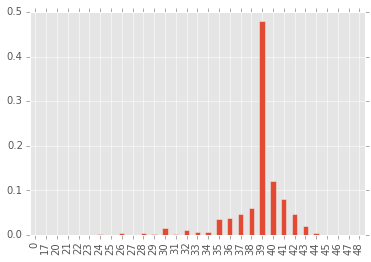

In [73]:
huh = firsts.prglngth.value_counts(normalize=True).\
sort_index().plot(kind='bar')

In [74]:
huh = firsts.prglngth.value_counts(normalize=True).\
sort_index()

duh = others.prglngth.value_counts(normalize=True).\
sort_index()

dfcf = pd.DataFrame({'first': huh,
                     'other': duh})

In [75]:
dfcf.tail(5)

,first,other
45,0.001360,0.000845
46,0.000227,NaN
47,0.000227,NaN
48,0.000680,0.000845
50,NaN,0.000422


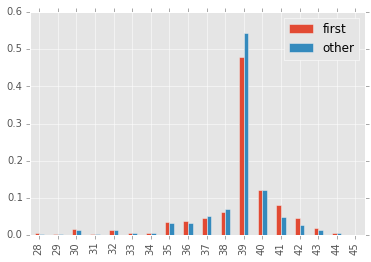

In [76]:
dfcf.loc[28:45].plot(kind='bar')


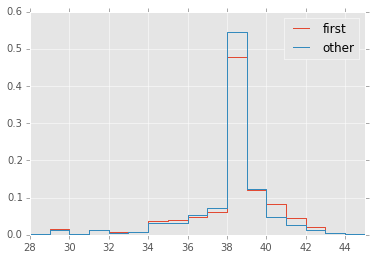

In [77]:
dfcf.loc[28:45].plot(drawstyle='steps')

By plotting the PMF instead of the histogram, we can compare the two distributions without being mislead by the difference in sample size. Based on this figure, first babies seem to be less likely than others to arrive on time (week 39) and more likely to be a late (weeks 41 and 42).

Histograms and PMFs are useful while you are exploring data and trying to identify patterns and relationships. Once you have an idea what is going on, a good next step is to design a visualization that makes the patterns you have identified as clear as possible.

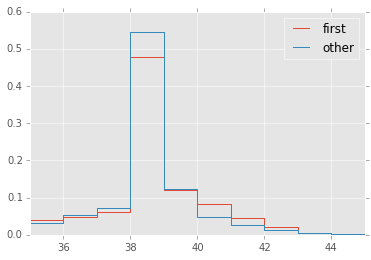

In [78]:
dfcf.loc[35:45].plot(drawstyle='steps')

In [79]:
dfcf.head()

,first,other
0,0.000227,NaN
4,NaN,0.000211
9,NaN,0.000211
13,NaN,0.000211
17,0.000227,0.000211


In [80]:
dfcf['delta'] = dfcf['first'] - dfcf['other']

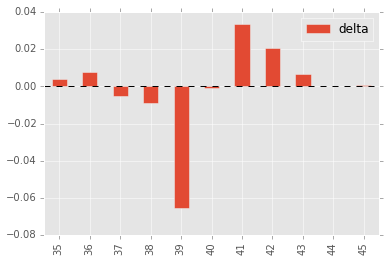

In [81]:
dfcf[['delta']].loc[35:45].plot(kind='bar')

This figure makes the pattern clearer: first babies are less likely to be born in week 39, and somewhat more likely to be born in weeks 41 and 42.

For now we should hold this conclusion only tentatively. We used the same dataset to identify an apparent different and then chose a visualization that makes the difference apparent. We can't be sure this effect is real; it might be due to random variation. We'll address this concern later.

### The class size paradox

Before we go on, I want to demonstrate one kind of computation you can do with Pmf objects; I call this example the "class size paradox."

At many American colleges and universities, the student-to-faculty ratio is about 10:1. But students are often surprised to discover that their average class size is bigger than 10. There are two reasons for this discrepancy:

* Students typically take 4-5 classes per semester, but professors often teach 1 or 2
* The number of students who enjoy a small class is small, but the number of students in a large class is (ahem!) large

The first effect is obvious, at least once it is pointed out; the second is more subtle. Let's look at an example. Suppose that a college offers 65 classes in a given semester, with the following distribution of sizes:

```
 size      count
 5- 9          8
10-14          8
15-19         14
20-24          4
25-29          6
30-34         12
35-39          8
40-44          3
45-49          2
```

In [82]:
classcount = [8,8,14,4,6,12,8,3,2]
classsize = [7,12,17,22,27,32,37,42,47]

dfstoopid = pd.DataFrame({'kount': classcount,
                         'size': classsize},
                        index=classsize)

In [83]:
dfstoopid

,kount,size
7,8,7
12,8,12
17,14,17
22,4,22
27,6,27
32,12,32
37,8,37
42,3,42
47,2,47


In [84]:
dfstoopid['huh'] = dfstoopid['kount']*dfstoopid['size']/ \
dfstoopid['kount'].sum()

In [85]:
dfstoopid

,kount,size,huh
7,8,7,0.861538
12,8,12,1.476923
17,14,17,3.661538
22,4,22,1.353846
27,6,27,2.492308
32,12,32,5.907692
37,8,37,4.553846
42,3,42,1.938462
47,2,47,1.446154


In [86]:
dfstoopid['wow'] = dfstoopid['kount']/dfstoopid['kount'].sum()

In [87]:
dfstoopid

,kount,size,huh,wow
7,8,7,0.861538,0.123077
12,8,12,1.476923,0.123077
17,14,17,3.661538,0.215385
22,4,22,1.353846,0.061538
27,6,27,2.492308,0.092308
32,12,32,5.907692,0.184615
37,8,37,4.553846,0.123077
42,3,42,1.938462,0.046154
47,2,47,1.446154,0.030769


In [88]:
bow = (dfstoopid['wow']*dfstoopid['size']).sum()

In [89]:
bow

23.692307692307693

In [90]:
dfstoopid.kount

7      8
12     8
17    14
22     4
27     6
32    12
37     8
42     3
47     2
Name: kount, dtype: int64

In [91]:
  d = { 7: 8, 12: 8, 17: 14, 22: 4, 
          27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }


In [92]:
pmf = thinkstats2.Pmf(d, label='actual')

In [93]:
pmf.Mean()

23.692307692307693

But if you survey a group of students, ask them how many students are in their classes, and compute the mean, you would think the average class was much bigger. Let's see how much bigger.



In [94]:
del dfstoopid['huh']

In [95]:
dfstoopid

,kount,size,wow
7,8,7,0.123077
12,8,12,0.123077
17,14,17,0.215385
22,4,22,0.061538
27,6,27,0.092308
32,12,32,0.184615
37,8,37,0.123077
42,3,42,0.046154
47,2,47,0.030769


In [96]:
dfstoopid['studentpov'] = (dfstoopid['size']*\
dfstoopid['wow'])

In [97]:
dfstoopid['studentpov'] = dfstoopid['studentpov']/\
dfstoopid['studentpov'].sum()

In [98]:
dfstoopid

,kount,size,wow,studentpov
7,8,7,0.123077,0.036364
12,8,12,0.123077,0.062338
17,14,17,0.215385,0.154545
22,4,22,0.061538,0.057143
27,6,27,0.092308,0.105195
32,12,32,0.184615,0.249351
37,8,37,0.123077,0.192208
42,3,42,0.046154,0.081818
47,2,47,0.030769,0.061039


In [99]:
dfstoopid.studentpov.sum()

1.0

In [100]:
bowdean = (dfstoopid['wow']*dfstoopid['size']).sum()

In [101]:
bowdean

23.692307692307693

In [102]:
bowstudent = (dfstoopid['studentpov']*dfstoopid['size']).sum()

In [103]:
bowstudent

29.123376623376622

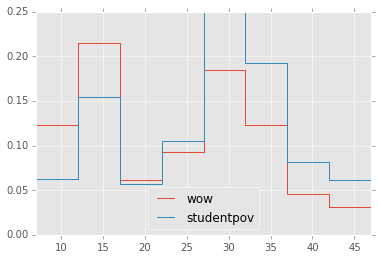

In [104]:
dfstoopid[['wow','studentpov']].plot(drawstyle='steps')

It is also possible to invert this operation. Suppose you want to find the distribution of class sizes at a college, but you can't get reliable data from the Dean. An alternative is to choose a random sample of students and ask how many students are in their classes. The result would be biased for the reasons we've just seen, but you can use it to estimate the actual distribution. 

In [105]:
import numpy as np
import pandas
array = np.random.randn(4,2)

In [106]:
df = pd.DataFrame(array)

In [107]:
df

,0,1
0,0.835728,1.266686
1,-1.612803,-0.369152
2,0.249752,-0.764082
3,0.524737,-0.654682


By default, the rows and columns are numbered starting at zero, but you can provide column names

In [108]:
columns = ['A', 'B']

In [109]:
df = pd.DataFrame(array, columns=columns)

In [110]:
df

,A,B
0,0.835728,1.266686
1,-1.612803,-0.369152
2,0.249752,-0.764082
3,0.524737,-0.654682


You can also provide row names. The set of row names is called the **index**; the row names themselves are called **labels**.

In [111]:
index = ['a', 'b', 'c', 'd']

In [112]:
df = pd.DataFrame(array, columns=columns,
                 index=index)

In [113]:
df

,A,B
a,0.835728,1.266686
b,-1.612803,-0.369152
c,0.249752,-0.764082
d,0.524737,-0.654682


In [114]:
df['A']

a    0.835728
b   -1.612803
c    0.249752
d    0.524737
Name: A, dtype: float64

In [115]:
df.loc['a']

A    0.835728
B    1.266686
Name: a, dtype: float64

In [116]:
df

,A,B
a,0.835728,1.266686
b,-1.612803,-0.369152
c,0.249752,-0.764082
d,0.524737,-0.654682


In [117]:
df.iloc[0]

A    0.835728
B    1.266686
Name: a, dtype: float64

In [118]:
indices = ['a', 'c']

In [119]:
df.loc[indices]

,A,B
a,0.835728,1.266686
c,0.249752,-0.764082


In [120]:
df['a':'c']

,A,B
a,0.835728,1.266686
b,-1.612803,-0.369152
c,0.249752,-0.764082


In [121]:
df[0:2]

,A,B
a,0.835728,1.266686
b,-1.612803,-0.369152


## Exercises  3.6

Solutions to these exercises are in ```chap03soln.ipynb``` and ```chap03soln.py```

### Exercise 1
Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample. Use the NSFG respondent variable ```NUMKDHH``` to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distribution, and compute their means.

In [122]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()

In [123]:
yo = resp['numkdhh'].value_counts().sort_index()

In [124]:
newresp = pd.DataFrame({'actualhist': yo,
                       'number': yo.index})

In [125]:
newresp

,actualhist,number
0,3563,0
1,1636,1
2,1500,2
3,666,3
4,196,4
5,82,5


In [126]:
newresp['actualpmf'] = newresp['actualhist']/newresp['actualhist'].sum()

In [127]:
newresp

,actualhist,number,actualpmf
0,3563,0,0.466178
1,1636,1,0.214052
2,1500,2,0.196258
3,666,3,0.087139
4,196,4,0.025644
5,82,5,0.010729


In [128]:
newresp['actualwow'] = newresp['number']*newresp['actualpmf']

In [129]:
newresp['actualwow'].sum()

1.0242051550438309

So the actual mean is 1.024205155.  

In [130]:
newresp['biased'] = newresp['number']*newresp['actualpmf']

In [131]:
newresp['biasedpmf'] = newresp['biased']/newresp['biased'].sum()

In [132]:
newresp['biasedwow'] = newresp['number']*newresp['biasedpmf']

In [133]:
newresp['biasedwow'].sum()

2.4036791006642821

So the biased mean is 2.403!

In [134]:
newresp

,actualhist,number,actualpmf,actualwow,biased,biasedpmf,biasedwow
0,3563,0,0.466178,0.000000,0.000000,0.000000,0.000000
1,1636,1,0.214052,0.214052,0.214052,0.208993,0.208993
2,1500,2,0.196258,0.392516,0.392516,0.383240,0.766479
3,666,3,0.087139,0.261416,0.261416,0.255238,0.765713
4,196,4,0.025644,0.102578,0.102578,0.100153,0.400613
5,82,5,0.010729,0.053644,0.053644,0.052376,0.261880


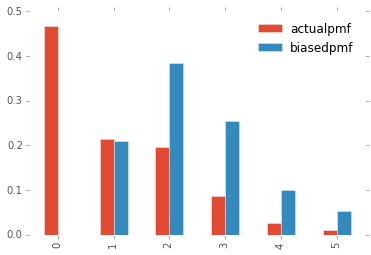

In [135]:
newresp[['actualpmf','biasedpmf']].plot(kind='bar')

### Exercise 3
I started with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a different between first babies and others for the same woman. To address this version of the question, select respondents who have at least two babies and compute pairwise differences. Does this formulation of the question yield a different result??

In [136]:
firsts

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
5,6,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
8,7,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
10,12,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3612.781968,4146.013572,6909.331618,1,31,NaN,7.8125
11,14,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,2418.069494,2810.302771,3039.904507,2,56,NaN,7.0000
15,15,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,1667.816099,3200.862017,5553.495599,1,33,NaN,7.6875
17,18,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,2957.257457,3404.403067,4153.371741,2,14,NaN,6.3125
19,21,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3408.342437,3965.763949,7237.122630,1,48,NaN,8.7500
21,23,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,6210.373020,8120.841310,13533.382043,2,64,NaN,5.5625


In [137]:
others

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
6,6,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
9,7,2,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250
12,14,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,2418.069494,2810.302771,3039.904507,2,56,NaN,4.0000
16,15,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,1667.816099,3200.862017,5553.495599,1,33,NaN,7.5000
20,21,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3408.342437,3965.763949,7237.122630,1,48,NaN,8.1875
24,24,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3409.573258,4068.628645,7424.840414,1,27,NaN,7.3750


Just merge ```firsts``` and ```others```

In [138]:
firsts[firsts['caseid'] == 10229]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
11099,10229,7,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,7.6875


In [139]:
others[others['caseid'] == 10229]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb


In [140]:
firsts['ssn'] = firsts['caseid']
others['ssn'] = others['caseid']

/Users/amylopezdooling/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/amylopezdooling/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [141]:
together = pd.merge(left=firsts,right=others,
                   left_on='caseid', 
                   right_on='caseid')

In [142]:
together.shape

(4735, 489)

In [143]:
firsts.shape

(4413, 245)

In [144]:
together[['caseid','pregordr_x','prglngth_x',
        'pregordr_y','prglngth_y']].head()

,caseid,pregordr_x,prglngth_x,pregordr_y,prglngth_y
0,1,1,39,2,39
1,2,1,39,2,39
2,2,1,39,3,39
3,6,1,38,2,40
4,6,1,38,3,42


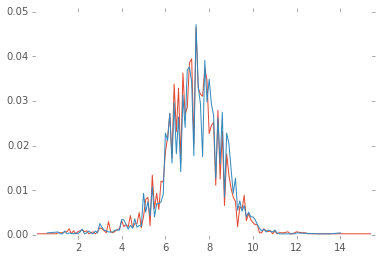

In [145]:
firsts['totalwgt_lb'].round(1).\
value_counts(normalize=True).sort_index().plot()
others['totalwgt_lb'].round(1).\
value_counts(normalize=True).sort_index().plot()

The CDF is the function that maps from a value to its percentile rank.

In [146]:
one = [1,2,2,3,5]

In [147]:
oneseries = pd.Series(one)
onepmf = oneseries.value_counts(normalize=True).sort_index()

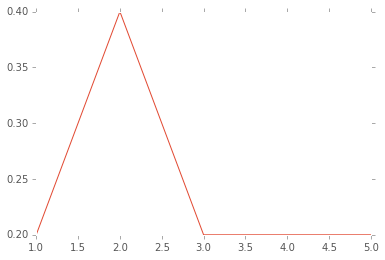

In [148]:
onepmf.plot()

In [149]:
onecdf = onepmf.cumsum()

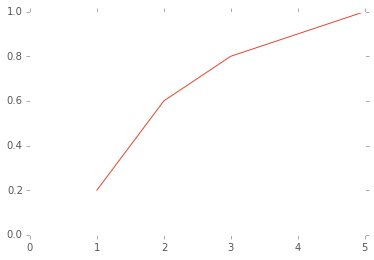

In [150]:
onecdf.plot(ylim=[0,1],xlim=[0,5])
#plt.ylim([0,1])


In [151]:
onecdf

1    0.2
2    0.6
3    0.8
5    1.0
dtype: float64

In [152]:
onecdf.iloc[0] = 0

In [153]:
onecdf

1    0.0
2    0.6
3    0.8
5    1.0
dtype: float64

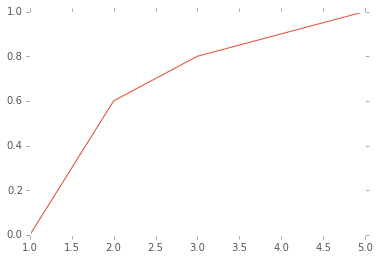

In [154]:
onecdf.plot()

In [155]:
liveprglngth = live.prglngth

In [156]:
liveprglngthpmf = live.prglngth.value_counts(normalize=
                True).sort_index()

In [157]:
liveprglngthcdf = liveprglngthpmf.cumsum()

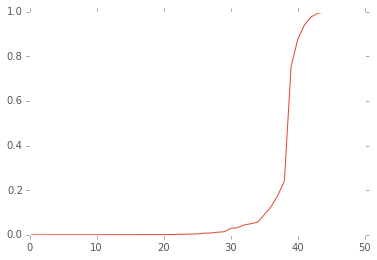

In [158]:
liveprglngthcdf.plot()

In [159]:
a = firsts.totalwgt_lb.value_counts(normalize=
            True).sort_index().cumsum()

b = others.totalwgt_lb.value_counts(normalize=
            True).sort_index().cumsum()

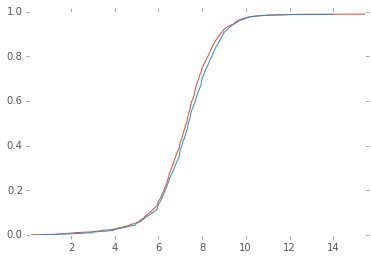

In [160]:
a.plot()
b.plot()

In [161]:
firsts.totalwgt_lb.quantile(.5)

7.3125

In [162]:
firsts.totalwgt_lb.median()

7.3125

In [163]:
others.totalwgt_lb.quantile(.5)

7.375

In [164]:
weights = live.totalwgt_lb
weightscdf = weights.value_counts(normalize=
        True).sort_index().cumsum()

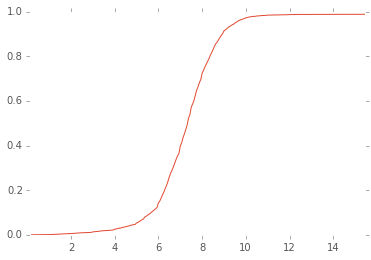

In [165]:
weightscdf.plot()

In [166]:
sample = np.random.choice(weights, 100, replace=True)

In [167]:
sample

array([ 10.25  ,   6.125 ,   7.0625,   6.5625,   8.5625,   7.25  ,
         8.75  ,   9.125 ,   7.25  ,   6.3125,   6.75  ,   7.9375,
         6.0625,   6.1875,   9.3125,   7.4375,   6.4375,   6.4375,
         8.75  ,   9.75  ,   7.4375,   8.5625,   6.4375,   5.6875,
         6.6875,   7.125 ,   6.875 ,   7.8125,   7.375 ,   8.125 ,
         6.6875,   7.9375,   6.    ,   7.9375,   7.75  ,   8.0625,
         7.875 ,   7.25  ,   8.25  ,   7.75  ,   8.625 ,   9.5625,
         7.3125,   6.75  ,   7.3125,   6.5   ,   7.8125,   7.0625,
         6.    ,   7.0625,   8.1875,   9.    ,   7.375 ,   1.75  ,
         4.1875,   8.375 ,   8.625 ,   7.9375,   7.125 ,   8.25  ,
         8.    ,   8.1875,   6.9375,   8.5625,   8.3125,   7.4375,
         8.3125,   9.0625,   7.4375,   6.5   ,   5.4375,   7.6875,
         3.625 ,   7.375 ,      nan,   5.    ,   7.125 ,   8.625 ,
         6.25  ,   6.125 ,   7.4375,   7.6875,   7.    ,   5.75  ,
         7.3125,   7.1875,   7.3125,   7.625 ,   6.4375,   2.2

In [168]:
from scipy import stats

In [169]:
stats.percentileofscore(weights, sample[0])

97.693484914735464

In [170]:
stats.percentileofscore(weights, sample[1])

15.784871010056841

In [171]:
yoyo = stats.percentileofscore(weights, sample)

/Users/amylopezdooling/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1651: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  pct = (np.mean(a_len[idx]) / n) * 100.0


In [172]:
len(sample)

100

In [173]:
yoyolist = list()
for i in range(len(sample)):
    yoyolist.append(stats.percentileofscore(weights, 
                sample[i]))

/Users/amylopezdooling/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [174]:
yoyolist

[97.693484914735464,
 15.784871010056841,
 40.440533449934414,
 26.836466987319636,
 83.739615216440754,
 46.174027109750767,
 86.860515959772627,
 92.031045037166592,
 46.174027109750767,
 19.987975513773502,
 31.356580673371226,
 68.883909051158724,
 14.713598600787057,
 17.151289899431571,
 93.468517708788795,
 52.984258854394405,
 23.059685177087889,
 23.059685177087889,
 86.860515959772627,
 96.157630083078274,
 52.984258854394405,
 83.739615216440754,
 23.059685177087889,
 9.8983384346305208,
 29.744206383909049,
 42.342588543944032,
 34.603191954525578,
 65.577175338871882,
 50.644949715784868,
 74.404241364232618,
 29.744206383909049,
 68.883909051158724,
 13.254263226934848,
 68.883909051158724,
 63.664188893747266,
 73.054219501530397,
 67.277000437254046,
 46.174027109750767,
 77.093353738522083,
 63.664188893747266,
 85.007651945780495,
 95.069960647135986,
 48.13620463489287,
 31.356580673371226,
 48.13620463489287,
 25.005465675557499,
 65.577175338871882,
 40.44053344993

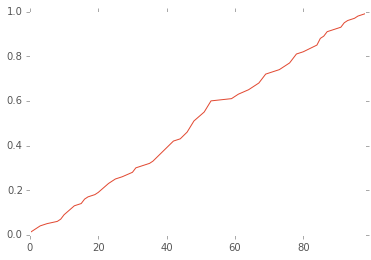

In [175]:
duh = pd.Series(yoyolist).round().value_counts(normalize=
            True).sort_index().cumsum().plot()

## 4.9 Exercises

### Exercise 1
How much did you weigh at birth? If you don't know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution of first babies. Otherwise use the distribution for others. 

In [176]:
firsts.totalwgt_lb.round(2).head()

0     8.81
2     9.12
5     8.56
8     7.56
10    7.81
Name: totalwgt_lb, dtype: float64

In [177]:
stats.percentileofscore(firsts.totalwgt_lb, 7.5)

57.46657602537956

In [178]:
stats.percentileofscore(others.totalwgt_lb, 7.5)

53.51636747624076

### Exercise 2
The numbers generated by ```random.random``` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability. Generate 1000 numbers from 
```random.random``` and plot their PMF and CDF. Is the distribution uniform?

In [179]:
rlist = np.random.random(2000)

In [180]:
rseries = pd.Series(rlist)

In [181]:
rpmf = rseries.round(3).value_counts(normalize=
            True).sort_index()

In [182]:
rcdf = rpmf.cumsum()

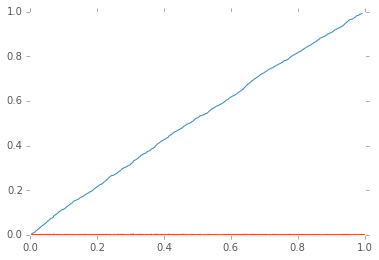

In [183]:
rpmf.plot()
rcdf.plot()

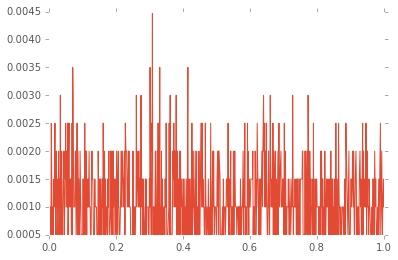

In [184]:
rpmf.plot()

## Chapter 5 Modeling distributions